<a href="https://colab.research.google.com/github/jeffheaton/stylegan2-toys/blob/master/morph_video_real.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
NETWORK = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl"
STEPS = 150
FPS = 30
FREEZE_STEPS = 30

# Upload images

In [ ]:
import os
def upload_file(file_name, new_name):
    # check if the file exists
    if not os.path.isfile(file_name):
        print(f"The file '{file_name}' does not exist.")
        return

    _, ext = os.path.splitext(file_name)
    new_name = f"{new_name}{ext}"

    try:
        # read the content of the file and write it to the target file
        with open(file_name, 'rb') as source_file, open(new_name, 'wb') as target_file:
            target_file.write(source_file.read())
            return new_name

        print(f"File '{file_name}' successfully uploaded as '{new_name}'.")
    except Exception as e:
        print(f"Error uploading file: {e}")

TARGET_NAME = upload_file("andrew_l.jpg", "target")
SOURCE_NAME = upload_file("kevin_j.jpg", "source")

# Install Software

Some software must be installed into Colab, for this notebook to work. We are specificially using these technologies:

* [Training Generative Adversarial Networks with Limited Data](https://arxiv.org/abs/2006.06676)
Tero Karras, Miika Aittala, Janne Hellsten, Samuli Laine, Jaakko Lehtinen, Timo Aila
* [One millisecond face alignment with an ensemble of regression trees](https://www.cv-foundation.org/openaccess/content_cvpr_2014/papers/Kazemi_One_Millisecond_Face_2014_CVPR_paper.pdf) Vahid Kazemi, Josephine Sullivan


In [ ]:
!wget http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_5_face_landmarks.dat.bz2

--2023-11-22 00:47:05--  http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5706710 (5.4M)
Saving to: ‘shape_predictor_5_face_landmarks.dat.bz2’

shape_predictor_5_f 100%[===================>]   5.44M  2.38MB/s    in 2.3s    

2023-11-22 00:47:08 (2.38 MB/s) - ‘shape_predictor_5_face_landmarks.dat.bz2’ saved [5706710/5706710]



In [ ]:
import sys
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
!pip install ninja
sys.path.insert(0, "/content/stylegan2-ada-pytorch")

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 131 (delta 0), reused 1 (delta 0), pack-reused 128
Receiving objects: 100% (131/131), 1.13 MiB | 28.94 MiB/s, done.
Resolving deltas: 100% (57/57), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 4.1 MB/s eta 0:00:00


# Preprocess Images for Best StyleGAN Results

The following are helper functions for the preprocessing.

shape: <_dlib_pybind11.full_object_detection object at 0x7e231bd6d870>
ex shape: 68
ex shape: (254, 358)


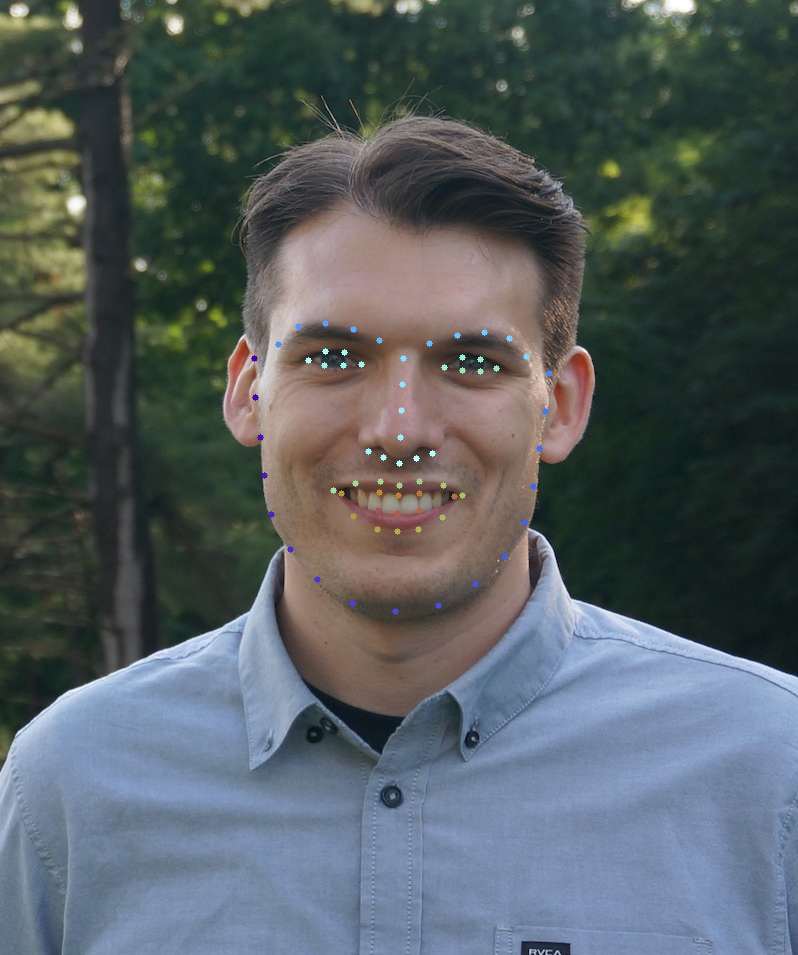

In [ ]:
# new version with 68 landmarks
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from PIL import Image
import dlib
import seaborn as sns

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
color_key = {}
cmap = sns.color_palette("Spectral", as_cmap=True)

def find_marks(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  rects = detector(gray, 0)

  if len(rects) == 0:
    raise ValueError("No faces detected")
  elif len(rects) > 1:
    raise ValueError("Multiple faces detected")

  shape = predictor(gray, rects[0])
  print(f"shape: {shape}")
  print(f"ex shape: {shape.num_parts}")
  print(f"ex shape: {shape.part(0)}")

  for i in range(shape.num_parts):
      x, y = shape.part(i).x, shape.part(i).y
      color = cmap(i / shape.num_parts)
      cv2.circle(img, (x, y), 3, (int(color[0] * 255), int(color[1] * 255), int(color[2] * 255)), -1)

      color_key[i] = color

  # display the image with landmarks
  cv2_imshow(img)

image_source = cv2.imread(SOURCE_NAME)
find_marks(image_source)

shape: <_dlib_pybind11.full_object_detection object at 0x7e231bd6fc70>
ex shape: 68
ex shape: (254, 358)


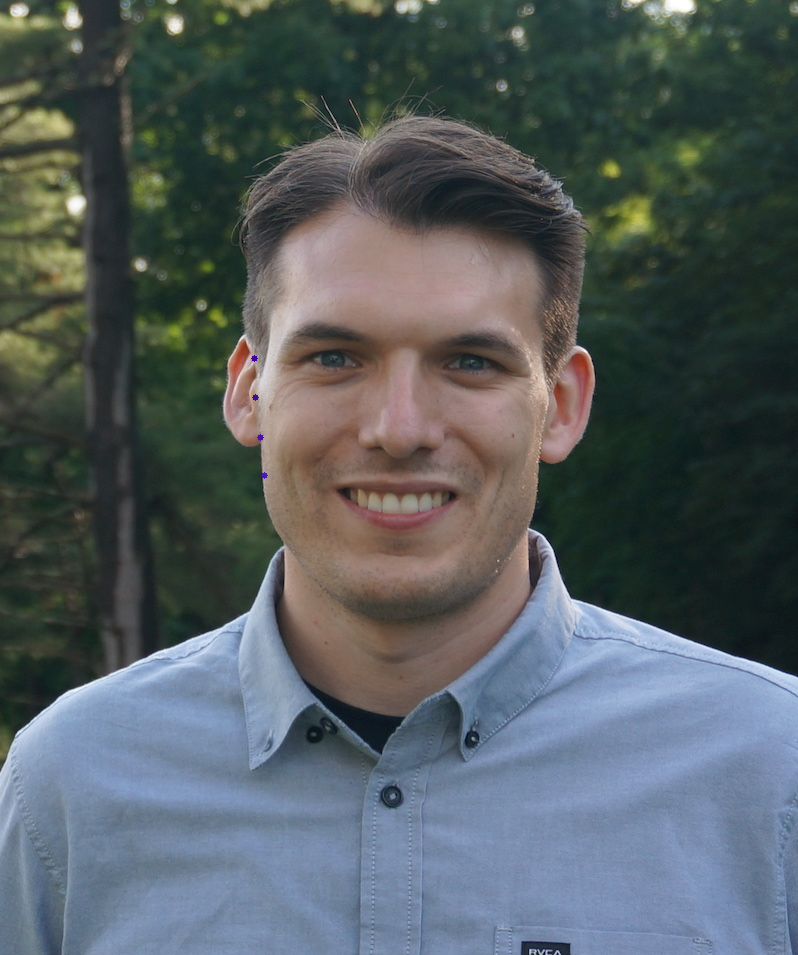

In [ ]:
# new version with 68 landmarks
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from PIL import Image
import dlib
import seaborn as sns

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
color_key = {}
cmap = sns.color_palette("Spectral", as_cmap=True)

def find_marks(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  rects = detector(gray, 0)

  if len(rects) == 0:
    raise ValueError("No faces detected")
  elif len(rects) > 1:
    raise ValueError("Multiple faces detected")

  shape = predictor(gray, rects[0])
  print(f"shape: {shape}")
  print(f"ex shape: {shape.num_parts}")
  print(f"ex shape: {shape.part(0)}")

  for i in range(4):
      x, y = shape.part(i).x, shape.part(i).y
      color = cmap(i / shape.num_parts)
      cv2.circle(img, (x, y), 3, (int(color[0] * 255), int(color[1] * 255), int(color[2] * 255)), -1)

      color_key[i] = color

  # display the image with landmarks
  cv2_imshow(img)

image_source = cv2.imread(SOURCE_NAME)
find_marks(image_source)

In [ ]:
# import matplotlib.pyplot as plt

# print("\nColor-Key Mapping:")
# for part_number, color in color_key.items():
#     print(f"Part {part_number}: {color}")
#     plt.figure()
#     plt.imshow([[color]])
#     plt.axis('off')
#     plt.show()

In [ ]:
# anchoring options
# 1 - eyes (5 landmark)
# 2 - nose
# 3 - left side
# 4 - right side
# 5 - chin

In [ ]:
def find_left_side(img):
  predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  rects = detector(gray, 0)

  if len(rects) == 0:
    raise ValueError("No faces detected")
  elif len(rects) > 1:
    raise ValueError("Multiple faces detected")

  shape = predictor(gray, rects[0])
  print(f"shape: {shape}")
  print(f"ex shape: {shape.num_parts}")
  print(f"ex shape: {shape.part(0)}")
  features = []

  for i in range(4):
    features.append((i, (shape.part(i).x, shape.part(i).y)))

  print(f"features: {features}")
  return (int(features[3][1][0] + features[2][1][0]) // 2, \
    int(features[3][1][1] + features[2][1][1]) // 2), \
    (int(features[1][1][0] + features[0][1][0]) // 2, \
    int(features[1][1][1] + features[0][1][1]) // 2)

In [ ]:
import cv2
import numpy as np
from PIL import Image
import dlib


def find_features(img, find_func):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  detector = dlib.get_frontal_face_detector()
  rects = detector(gray, 0)

  predictor = (
      dlib.shape_predictor('shape_predictor_5_face_landmarks.dat')
      if find_func.__name__ == "find_eyes"
      else dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
  )

  if len(rects) == 0:
    raise ValueError("No faces detected")
  elif len(rects) > 1:
    raise ValueError("Multiple faces detected")

    shape = predictor(gray, rects[0])
    print(f"shape: {shape}")
    print(f"ex shape: {shape.num_parts}")
    print(f"ex shape: {shape.part(0)}")
    features = []

    return find_func(features, shape)

def find_eyes(features, shape):

  for i in range(0, 5):
    features.append((i, (shape.part(i).x, shape.part(i).y)))

  print(f"features: {features}")
  return (int(features[3][1][0] + features[2][1][0]) // 2, \
    int(features[3][1][1] + features[2][1][1]) // 2), \
    (int(features[1][1][0] + features[0][1][0]) // 2, \
    int(features[1][1][1] + features[0][1][1]) // 2)

def crop_stylegan(img):
  left_eye, right_eye = find_features(img, find_eyes)
  d = abs(right_eye[0] - left_eye[0])
  z = 255/d
  ar = img.shape[0]/img.shape[1]
  w = img.shape[1] * z
  img2 = cv2.resize(img, (int(w), int(w*ar)))
  bordersize = 1024
  img3 = cv2.copyMakeBorder(
      img2,
      top=bordersize,
      bottom=bordersize,
      left=bordersize,
      right=bordersize,
      borderType=cv2.BORDER_REPLICATE)

  left_eye2, right_eye2 = find_features(img3)

  crop1 = left_eye2[0] - 385
  crop0 = left_eye2[1] - 490
  print(crop1)
  print(crop0)
  return img3[crop0:crop0+1024,crop1:crop1+1024]

The following will preprocess and crop your images.  If you receive an error indicating multiple faces were found, try to crop your image better or obscure the background.  If the program does not see a face, then attempt to obtain a clearer and more high-resolution image.

In [ ]:
from matplotlib import pyplot as plt
import cv2

image_source = cv2.imread(SOURCE_NAME)
if image_source is None:
    raise ValueError("Source image not found")

image_target = cv2.imread(TARGET_NAME)
if image_target is None:
    raise ValueError("Source image not found")

cropped_source = crop_stylegan(image_source)
cropped_target = crop_stylegan(image_target)

img = cv2.cvtColor(cropped_source, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('source')
plt.show()

img = cv2.cvtColor(cropped_target, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('target')
plt.show()

cv2.imwrite("cropped_source.png", cropped_source)
cv2.imwrite("cropped_target.png", cropped_target)

#print(find_eyes(cropped_source))
#print(find_eyes(cropped_target))

TypeError: ignored

# Convert Source to a GAN

First, we convert the source to a GAN latent vector.  This process will take several minutes.

In [ ]:
cmd = f"python /content/stylegan2-ada-pytorch/projector.py --save-video 0 --num-steps 1000 --outdir=out_source --target=cropped_source.png --network={NETWORK}"
!{cmd}

Traceback (most recent call last):
  File "/content/stylegan2-ada-pytorch/projector.py", line 22, in <module>
    import dnnlib
ModuleNotFoundError: No module named 'dnnlib'


# Convert Target to a GAN

Next, we convert the target to a GAN latent vector.  This process will also take several minutes.

In [ ]:
cmd = f"python /content/stylegan2-ada-pytorch/projector.py --save-video 0 --num-steps 1000 --outdir=out_target --target=cropped_target.png --network={NETWORK}"
!{cmd}

Traceback (most recent call last):
  File "/content/stylegan2-ada-pytorch/projector.py", line 22, in <module>
    import dnnlib
ModuleNotFoundError: No module named 'dnnlib'


With the conversion complete, lets have a look at the two GANs.

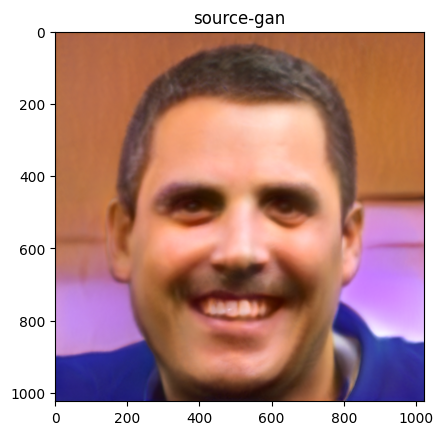

In [ ]:
img_gan_source = cv2.imread('/content/out_source/proj.png')
img = cv2.cvtColor(img_gan_source, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('source-gan')
plt.show()

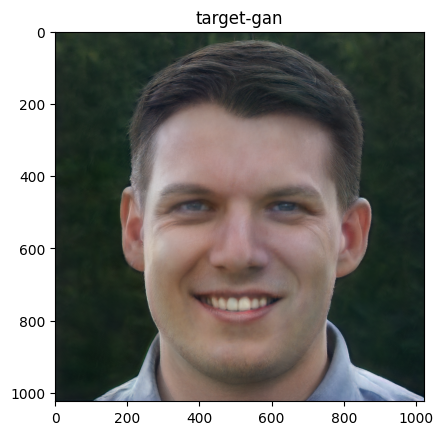

In [ ]:
img_gan_target = cv2.imread('/content/out_target/proj.png')
img = cv2.cvtColor(img_gan_target, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('target-gan')
plt.show()

# Build the Video

The following code builds a transition video between the two latent vectors previously obtained.

In [ ]:
import torch
import dnnlib
import legacy
import PIL.Image
import numpy as np
import imageio
from tqdm.notebook import tqdm

lvec1 = np.load('/content/out_source/projected_w.npz')['w']
lvec2 = np.load('/content/out_target/projected_w.npz')['w']

network_pkl = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl"
device = torch.device('cuda')
with dnnlib.util.open_url(network_pkl) as fp:
    G = legacy.load_network_pkl(fp)['G_ema'].requires_grad_(False).to(device) # type: ignore

diff = lvec2 - lvec1
step = diff / STEPS
current = lvec1.copy()
target_uint8 = np.array([1024,1024,3], dtype=np.uint8)

video = imageio.get_writer('/content/movie.mp4', mode='I', fps=FPS, codec='libx264', bitrate='16M')

for j in tqdm(range(STEPS)):
  z = torch.from_numpy(current).to(device)
  synth_image = G.synthesis(z, noise_mode='const')
  synth_image = (synth_image + 1) * (255/2)
  synth_image = synth_image.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()

  repeat = FREEZE_STEPS if j==0 or j==(STEPS-1) else 1

  for i in range(repeat):
    video.append_data(synth_image)
  current = current + step


video.close()

  0%|          | 0/150 [00:00<?, ?it/s]

Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


# Download your Video

If you made it through all of these steps, you are now ready to download your video.

In [ ]:
from google.colab import files
files.download("movie.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>